In [209]:
# Pandas for DataFrames
import pandas as pd
# NumPy for numerical computing
import numpy as np
# Seaborn for easier visualization
import seaborn as sns
#sns.set_style('darkgrid')
# Matplotlib for visualization
import matplotlib.pyplot as plt
# display plots in the notebook
%matplotlib inline

#For the linear regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [107]:
#Read the training data using pandas as a csv
df_heart = pd.read_csv ("heart_train_values.csv")
#Read the labels using pandas as a csv
df_heart_labels =  pd.read_csv ("heart_train_labels.csv")
df_heart.head(2)

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0


In [108]:
#Merge the labels and the data to get one dataframe with everything
df_heart = pd.merge(df_heart, df_heart_labels, on="patient_id")
df_heart.set_index('patient_id', inplace=True)

In [109]:
#Sanity check
print(df_heart.columns)
print(df_heart.shape)
df_heart["heart_disease_present"].value_counts()
# Column datatypes
df_heart.dtypes

Index(['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')
(180, 14)


slope_of_peak_exercise_st_segment         int64
thal                                     object
resting_blood_pressure                    int64
chest_pain_type                           int64
num_major_vessels                         int64
fasting_blood_sugar_gt_120_mg_per_dl      int64
resting_ekg_results                       int64
serum_cholesterol_mg_per_dl               int64
oldpeak_eq_st_depression                float64
sex                                       int64
age                                       int64
max_heart_rate_achieved                   int64
exercise_induced_angina                   int64
heart_disease_present                     int64
dtype: object

In [75]:
df_heart.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


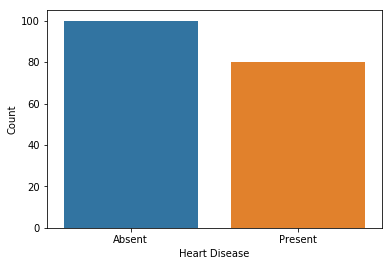

In [39]:
#First plot to get an understanding of the training data whether it is skewed
sns.countplot(x="heart_disease_present", data=df_heart)
plt.xticks([0,1],["Absent","Present"])
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.savefig("Heart Disease counts.png")

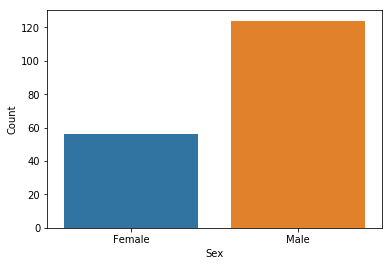

In [41]:
#Plot 2 - get an idea of the distribution of data using sex indicator
sns.countplot(x="sex", data=df_heart)
plt.xticks([0,1],["Female","Male"])
plt.xlabel("Sex")
plt.ylabel("Count")
plt.savefig("Sex compare.png")

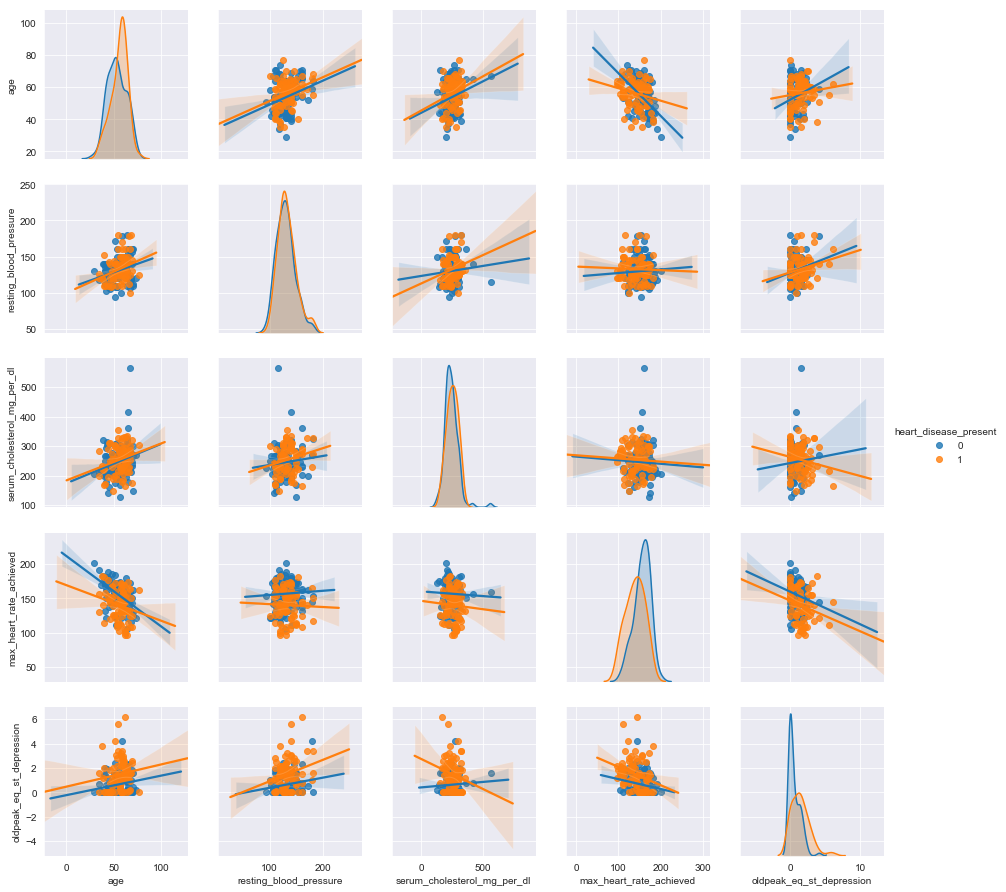

<Figure size 1152x1008 with 0 Axes>

In [74]:
#Create a subset of the data to remove the categorical, binary and ordered data
#Do a regression line and use indicator variable 
g = sns.pairplot(df_heart, vars =['age', 'resting_blood_pressure','serum_cholesterol_mg_per_dl',
                                  'max_heart_rate_achieved','oldpeak_eq_st_depression'], 
                 kind='reg', hue='heart_disease_present')
plt.figure(figsize=(16,14))
plt.savefig("Pair plots of numeric vars.png")

In [9]:
#create a subset of the data for females only
#df_heart_f = df_heart[df_heart['sex'] == 0]
#print(df_heart_f.shape)
#g = sns.pairplot(df_heart_f, vars =['age',
#                          'resting_blood_pressure',
#                          'serum_cholesterol_mg_per_dl',
#                          'slope_of_peak_exercise_st_segment',
#                          'max_heart_rate_achieved', 
#                          'num_major_vessels',
#                          'oldpeak_eq_st_depression'], kind="reg")

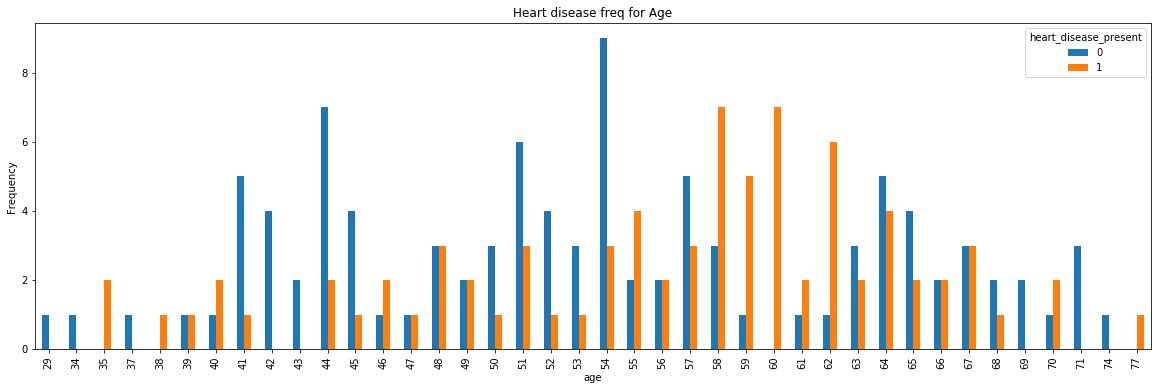

In [42]:
pd.crosstab(df_heart.age, df_heart.heart_disease_present).plot(kind="bar", figsize=(20,6))
plt.ylabel("Frequency")
plt.title('Heart disease freq for Age')
plt.savefig('Freq for Age.png')

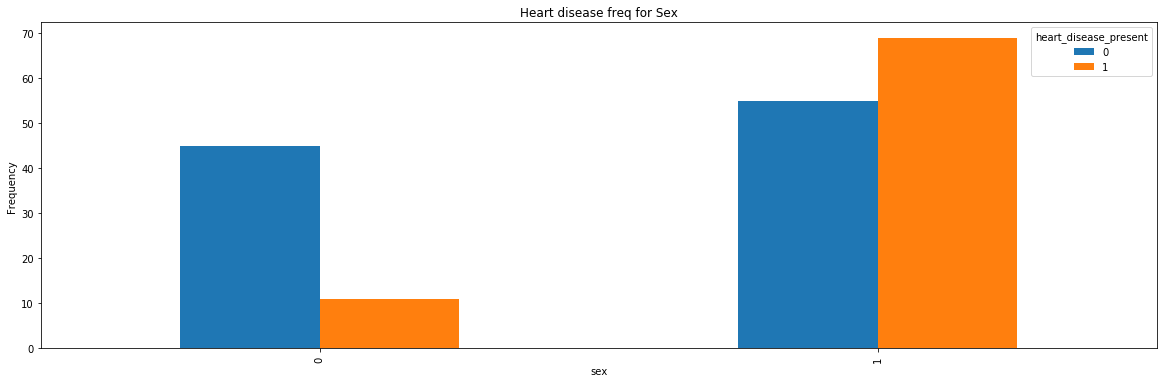

In [50]:
pd.crosstab(df_heart.sex, df_heart.heart_disease_present).plot(kind="bar", figsize=(20,6))
plt.ylabel("Frequency")
plt.title('Heart disease freq for Sex')
plt.savefig('Freq for Sex.png')

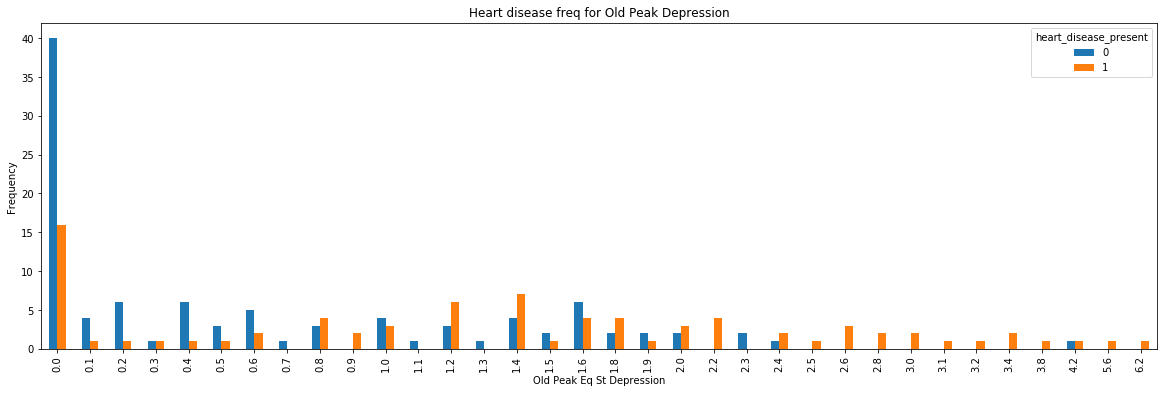

In [43]:
pd.crosstab(df_heart.oldpeak_eq_st_depression, df_heart.heart_disease_present).plot(kind="bar", figsize=(20,6))
plt.ylabel("Frequency")
plt.xlabel("Old Peak Eq St Depression")
plt.title('Heart disease freq for Old Peak Depression')
plt.savefig('Freq for Old Peak Depression.png')

In [14]:
df_heart.columns

Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

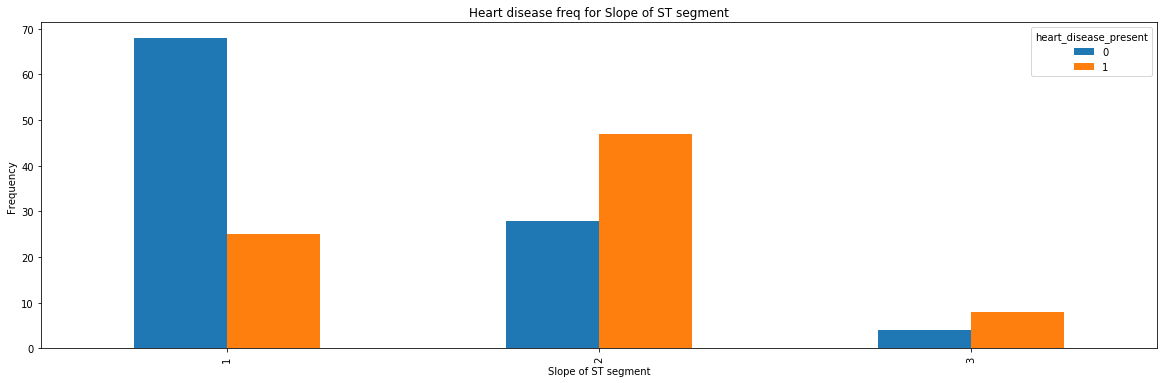

In [44]:
pd.crosstab(df_heart.slope_of_peak_exercise_st_segment, df_heart.heart_disease_present).plot(kind="bar", figsize=(20,6))
plt.ylabel("Frequency")
plt.xlabel("Slope of ST segment")
plt.title('Heart disease freq for Slope of ST segment')
plt.savefig('Freq for Slope of ST seg.png')

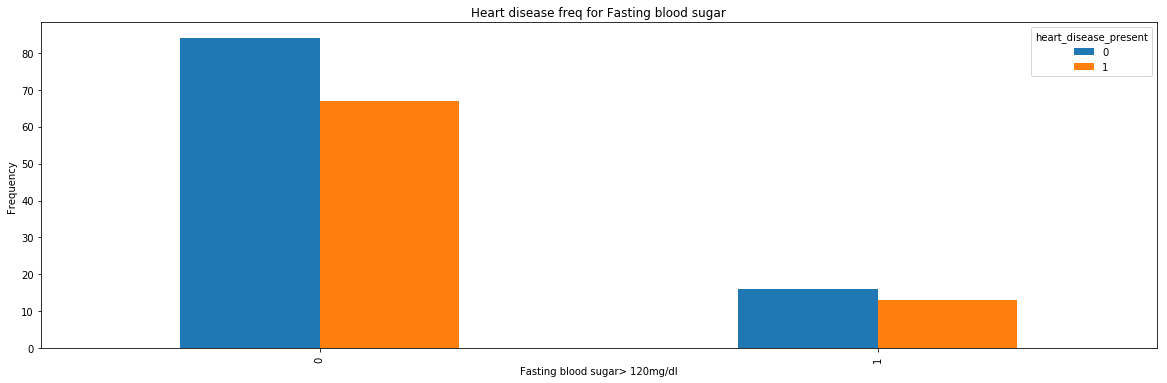

In [45]:
pd.crosstab(df_heart.fasting_blood_sugar_gt_120_mg_per_dl, df_heart.heart_disease_present).plot(kind="bar", figsize=(20,6))
plt.ylabel("Frequency")
plt.xlabel("Fasting blood sugar> 120mg/dl")
plt.title('Heart disease freq for Fasting blood sugar')
plt.savefig('Freq for Fasting blood sugar.png')

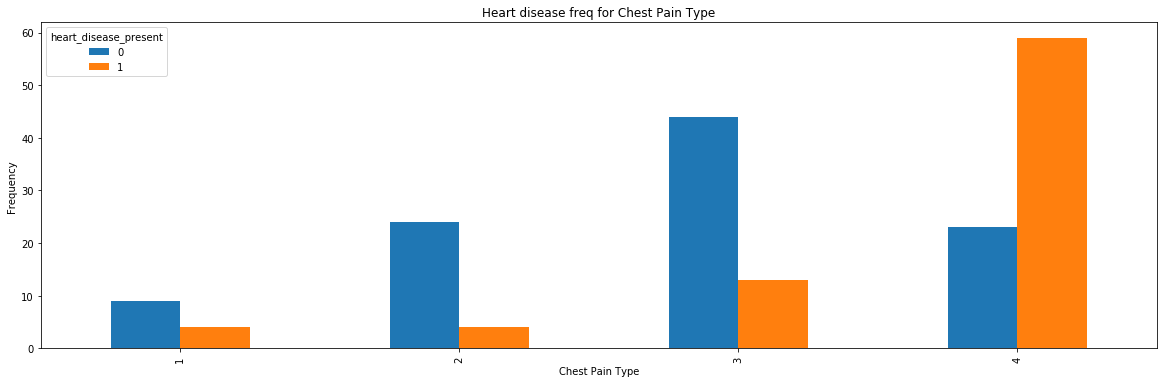

In [46]:
pd.crosstab(df_heart.chest_pain_type, df_heart.heart_disease_present).plot(kind="bar", figsize=(20,6))
plt.ylabel("Frequency")
plt.xlabel("Chest Pain Type")
plt.title('Heart disease freq for Chest Pain Type')
plt.savefig('Freq for Chest Pain Type.png')

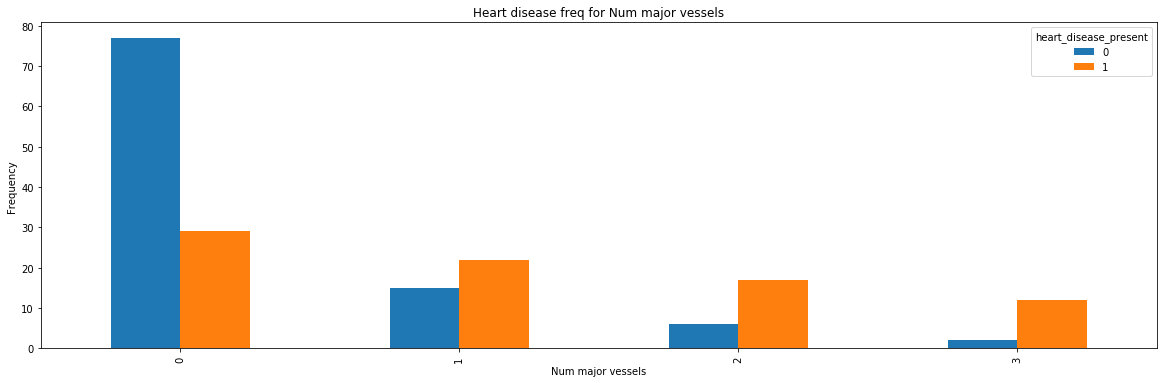

In [47]:
pd.crosstab(df_heart.num_major_vessels, df_heart.heart_disease_present).plot(kind="bar", figsize=(20,6))
plt.ylabel("Frequency")
plt.xlabel("Num major vessels")
plt.title('Heart disease freq for Num major vessels')
plt.savefig('Freq for Num major vessels.png')

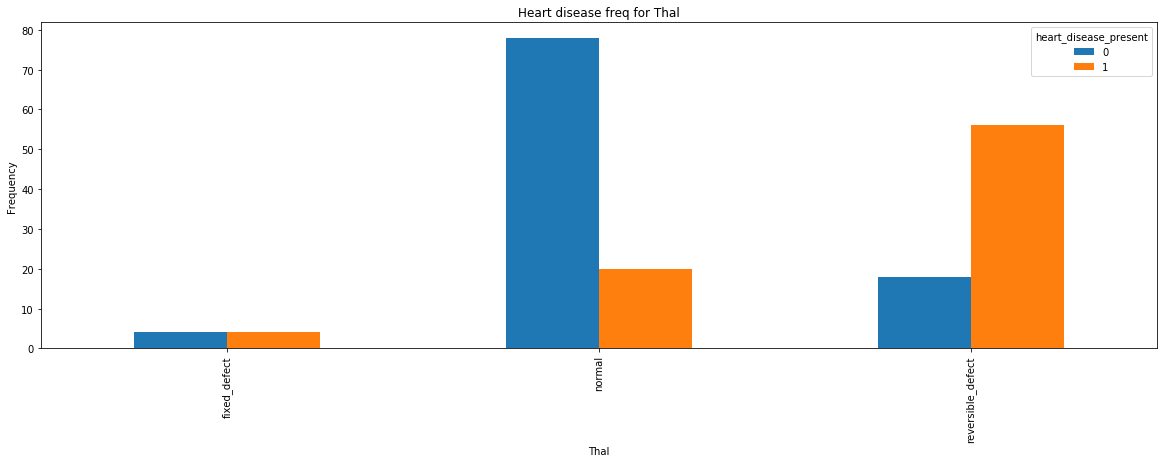

In [48]:
pd.crosstab(df_heart.thal, df_heart.heart_disease_present).plot(kind="bar", figsize=(20,6))
plt.ylabel("Frequency")
plt.xlabel("Thal")
plt.title('Heart disease freq for Thal')
plt.savefig('Freq for Thal.png')

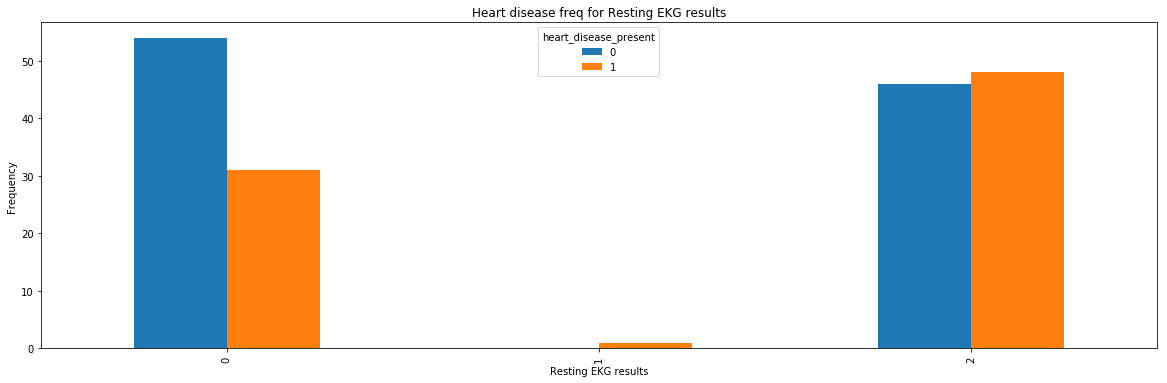

In [49]:
pd.crosstab(df_heart.resting_ekg_results, df_heart.heart_disease_present).plot(kind="bar", figsize=(20,6))
plt.ylabel("Frequency")
plt.xlabel("Resting EKG results")
plt.title('Heart disease freq for Resting EKG results')
plt.savefig('Freq for Resting EKG results.png')

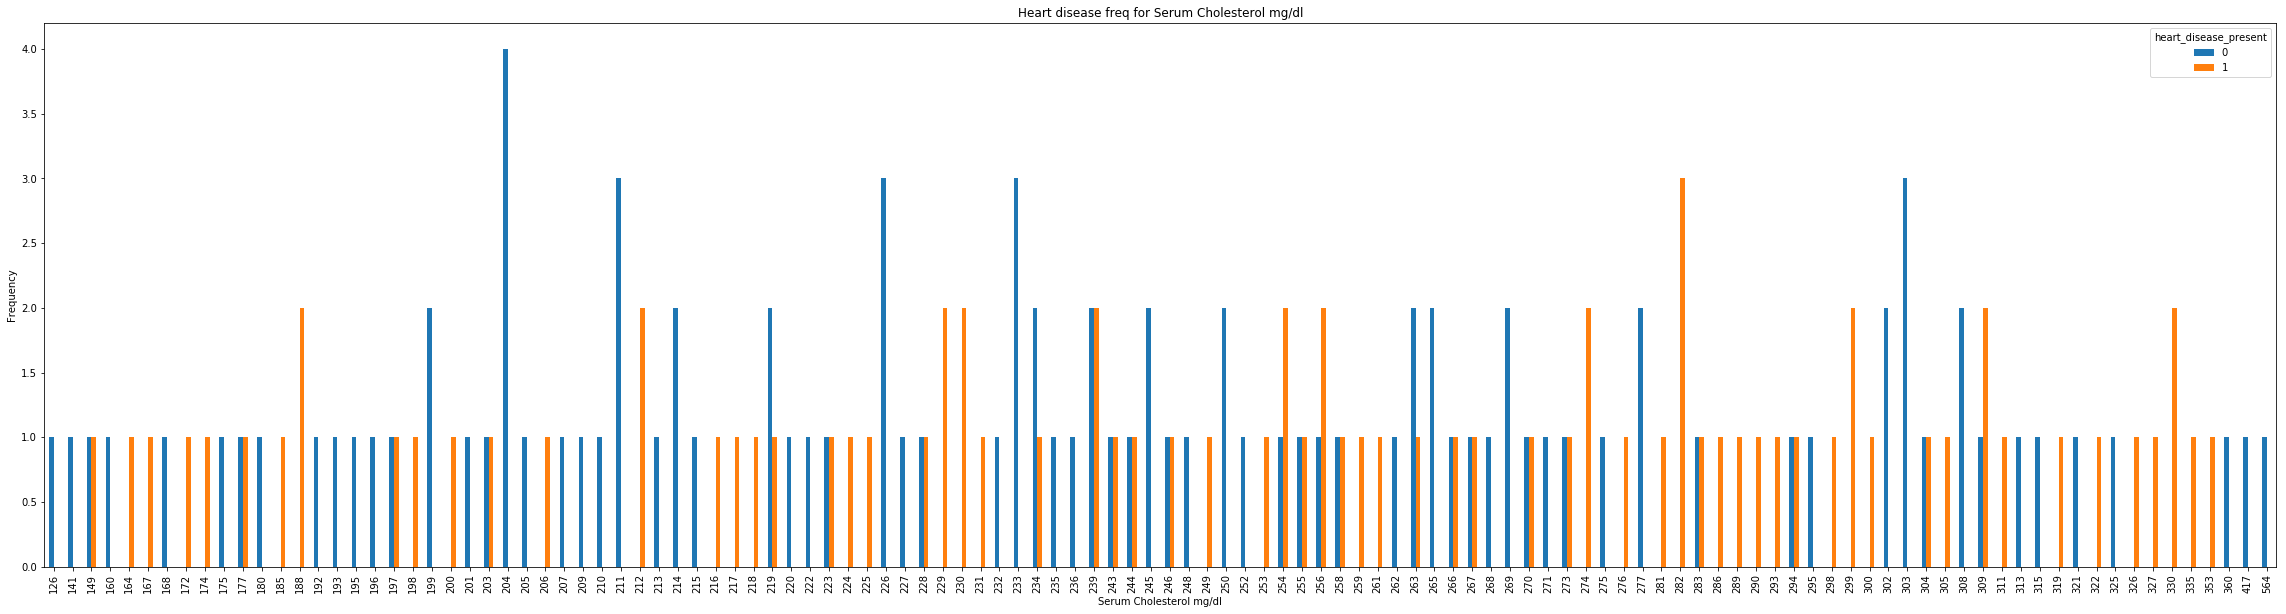

In [28]:
pd.crosstab(df_heart.serum_cholesterol_mg_per_dl, df_heart.heart_disease_present).plot(kind="bar", figsize=(40,10))
plt.ylabel("Frequency")
plt.xlabel("Serum Cholesterol mg/dl")
plt.title('Heart disease freq for Serum Cholesterol mg/dl')
plt.savefig("Freq for Serum cholesterol.png")

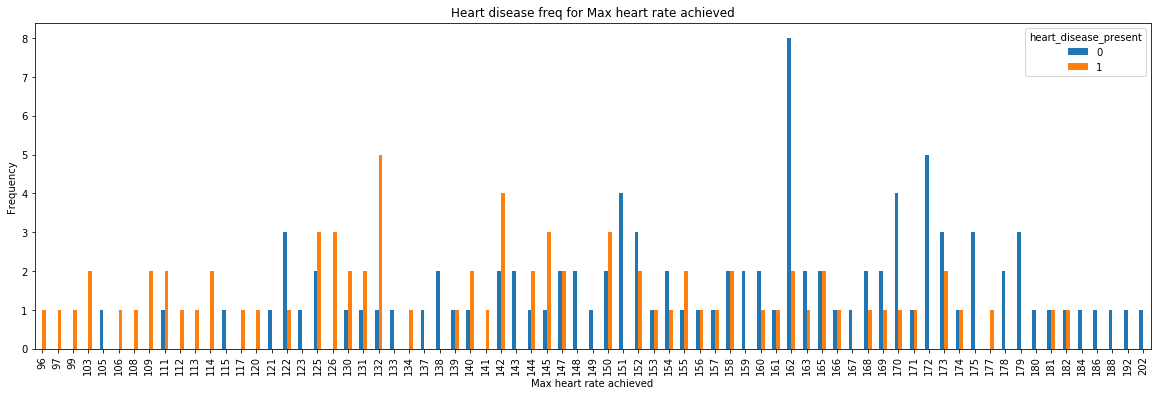

In [29]:
pd.crosstab(df_heart.max_heart_rate_achieved, df_heart.heart_disease_present).plot(kind="bar", figsize=(20,6))
plt.ylabel("Frequency")
plt.xlabel("Max heart rate achieved")
plt.title('Heart disease freq for Max heart rate achieved')
plt.savefig("Freq for Max Heart Rate.png")

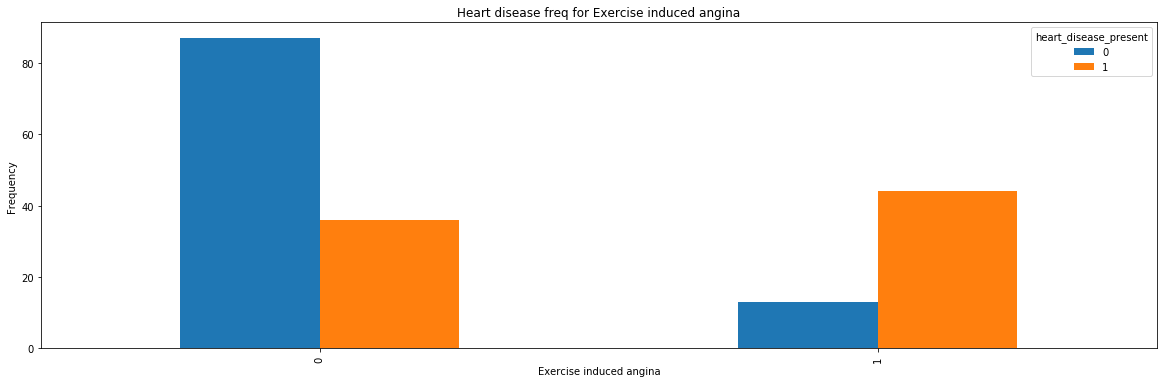

In [30]:
pd.crosstab(df_heart.exercise_induced_angina, df_heart.heart_disease_present).plot(kind="bar", figsize=(20,6))
plt.ylabel("Frequency")
plt.xlabel("Exercise induced angina")
plt.title('Heart disease freq for Exercise induced angina')
plt.savefig("Freq for Exercise Induced.png")

In [110]:
# Calculate correlations between numeric features
correlations = df_heart.corr()

In [78]:
print(correlations)

                                      slope_of_peak_exercise_st_segment  \
slope_of_peak_exercise_st_segment                              1.000000   
resting_blood_pressure                                         0.098287   
chest_pain_type                                                0.121207   
num_major_vessels                                              0.076832   
fasting_blood_sugar_gt_120_mg_per_dl                           0.050199   
resting_ekg_results                                            0.172191   
serum_cholesterol_mg_per_dl                                   -0.032348   
oldpeak_eq_st_depression                                       0.615948   
sex                                                            0.093340   
age                                                            0.169918   
max_heart_rate_achieved                                       -0.418102   
exercise_induced_angina                                        0.225459   
heart_disease_present    

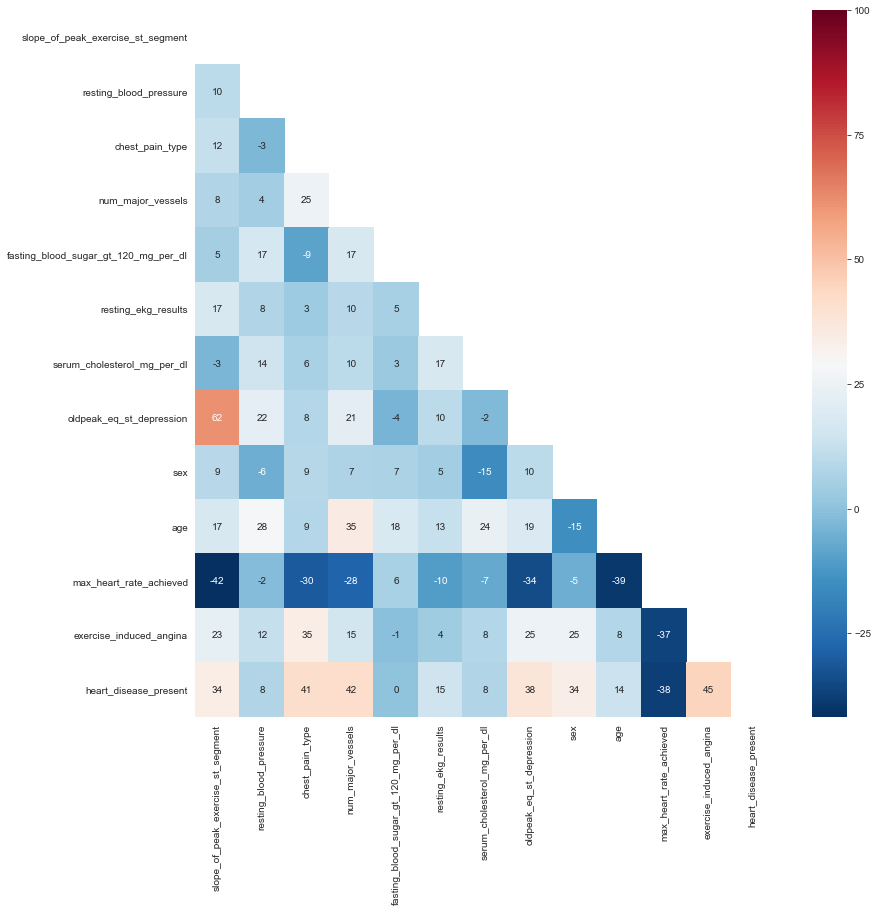

In [122]:
# Increase the figsize to 13 x 13
plt.figure(figsize=(13,13))

# Create a mask
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


# Plot heatmap of correlations
#sns.heatmap(correlations, cmap='RdBu_r')
sns.heatmap(correlations * 100,
            cmap='RdBu_r',
            annot=True,
            fmt='.0f',
            mask=mask,
            cbar= True);

plt.savefig("CorrelationHeatMap.png")

In [120]:
# Get dummy variables and display first 5 observations
df_heart_dummy=pd.get_dummies( df_heart, columns=['slope_of_peak_exercise_st_segment','thal', 'chest_pain_type','num_major_vessels',
                                                  'exercise_induced_angina', 'sex','resting_ekg_results', 'fasting_blood_sugar_gt_120_mg_per_dl'])


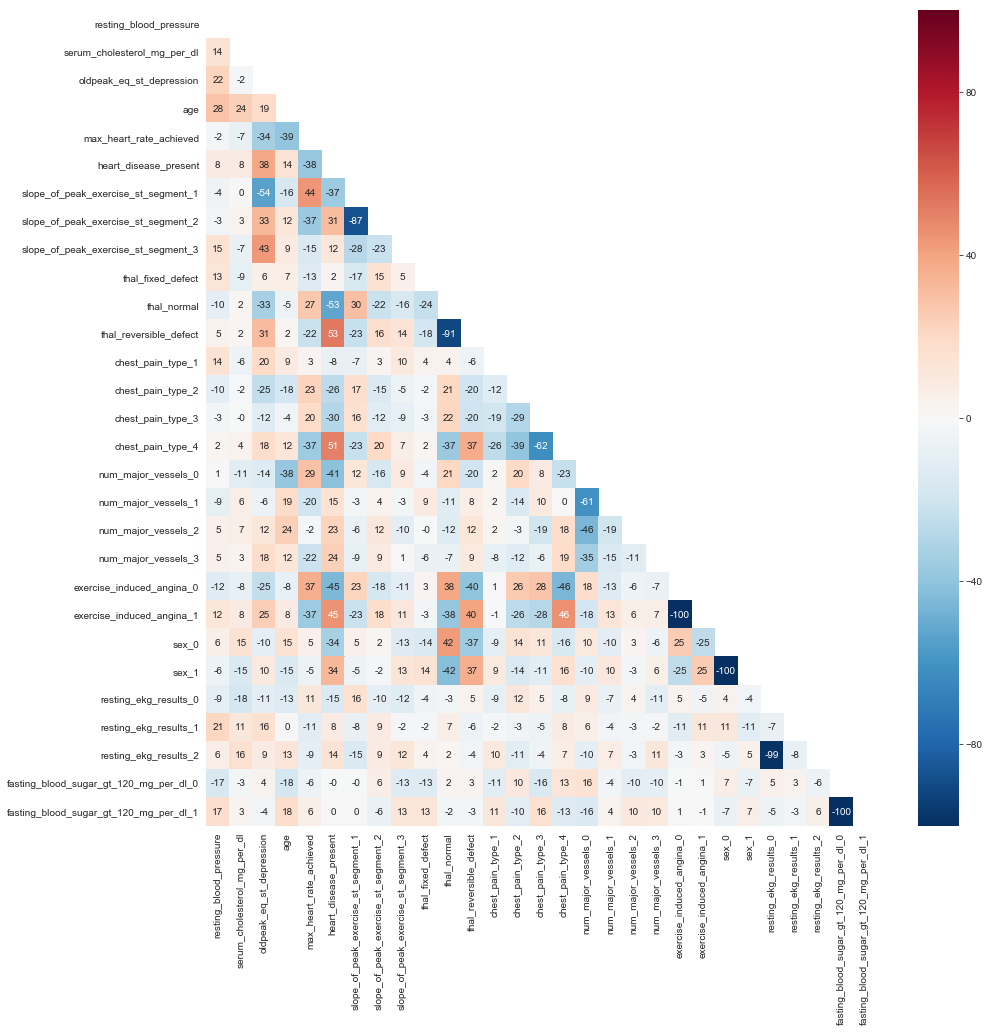

In [123]:
# Increase the figsize to 15 x 15
plt.figure(figsize=(15,15))

# Create a mask
mask = np.zeros_like(df_heart_dummy.corr())
mask[np.triu_indices_from(mask)] = 1

sns.set_style('white')
# Plot heatmap of correlations
sns.heatmap(df_heart_dummy.corr()*100,
            cmap='RdBu_r',
            annot=True,
            fmt='.0f',
            mask=mask,
            cbar= True);
plt.savefig("CorrelationHeatMapWithDummies.png")

In [124]:
df_heart_dummy.shape  #['fasting_blood_sugar_gt_120_mg_per_dl_1']

(180, 29)

In [213]:
def load_train_test_data():
    category_columns=['thal',
                      'slope_of_peak_exercise_st_segment',  
                      'chest_pain_type',
                      'num_major_vessels', 
                      'exercise_induced_angina']
    
    features_to_drop = ['fasting_blood_sugar_gt_120_mg_per_dl', 
                        'sex', 
                        'age', 
                        'resting_ekg_results',
                        'resting_blood_pressure', 
                        'serum_cholesterol_mg_per_dl']
    
    df_train_values = pd.read_csv('heart_train_values.csv')
    df_train_labels = pd.read_csv('heart_train_labels.csv')
    #Merge TRAIN data so that we have
    df_train = pd.merge(df_train_values, df_train_labels, on='patient_id')
    
    df_train_expanded = pd.get_dummies(df_train, columns=category_columns)
    df_train_expanded.drop(columns=features_to_drop, axis=1, inplace=True)
    
    #TEST data comes with patient id and target variable 
    df_test_values = pd.read_csv('heart_test.csv')
    
    df_test_expanded = pd.get_dummies(df_test_values, columns=category_columns)
    df_test_expanded.drop(columns=features_to_drop, axis=1, inplace=True)
    return df_train_expanded, df_test_expanded

In [214]:
df_train_data, df_test_data = load_train_test_data()

In [215]:
df_train_data.columns

Index(['patient_id', 'oldpeak_eq_st_depression', 'max_heart_rate_achieved',
       'heart_disease_present', 'thal_fixed_defect', 'thal_normal',
       'thal_reversible_defect', 'slope_of_peak_exercise_st_segment_1',
       'slope_of_peak_exercise_st_segment_2',
       'slope_of_peak_exercise_st_segment_3', 'chest_pain_type_1',
       'chest_pain_type_2', 'chest_pain_type_3', 'chest_pain_type_4',
       'num_major_vessels_0', 'num_major_vessels_1', 'num_major_vessels_2',
       'num_major_vessels_3', 'exercise_induced_angina_0',
       'exercise_induced_angina_1'],
      dtype='object')

In [216]:
# Separate input feature(s) and target variable
X = df_train_data.drop(['patient_id','heart_disease_present'], axis=1)
y = df_train_data.heart_disease_present

In [217]:
# Run a logistic raegression
# Initialize model instance
lm = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Fit model
lm.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Confidence     :  0.8333333333333334
Accuracy Score :  0.8333333333333334
Sample Logloss :  0.5251
Confusion Matrix:
[[13  1]
 [ 5 17]]
Classification Report
              precision    recall  f1-score   support

           0       0.72      0.93      0.81        14
           1       0.94      0.77      0.85        22

   micro avg       0.83      0.83      0.83        36
   macro avg       0.83      0.85      0.83        36
weighted avg       0.86      0.83      0.84        36



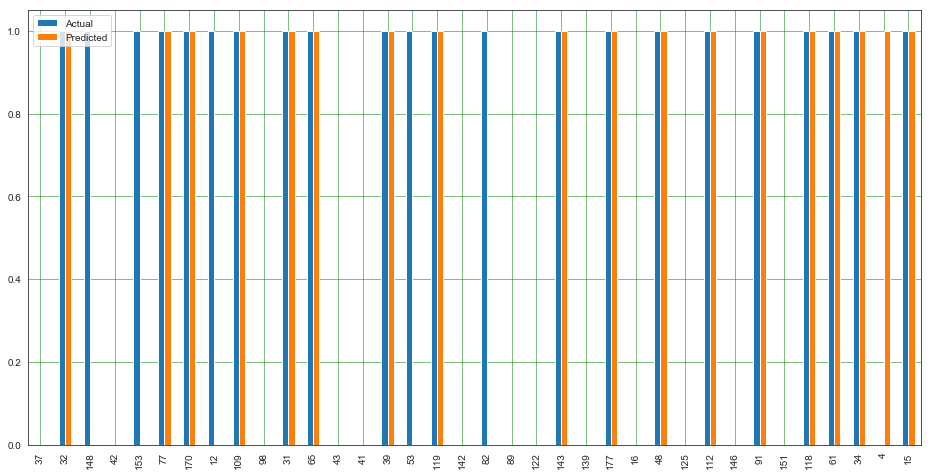

In [219]:
y_pred = lm.predict(X_test)
    
print('Confidence     : ', lm.score(X_test, y_test))
print('Accuracy Score : ', metrics.accuracy_score(y_test, y_pred))
print('Sample Logloss : ', np.round(metrics.log_loss(y_test, lm.predict_proba(X_test)),4))

print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

print("Classification Report")
print(metrics.classification_report(y_test, y_pred))
# Get RANDOM samples for plotting...
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(50).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

In [198]:
y_pred

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1])

In [220]:
def get_random_forest_model(X, y, verbose = True) :
    # Perform Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestClassifier(),
        param_grid={
            'max_depth': range(3,7),
            'n_estimators': (10, 50, 100, 300, 500, 1000),
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, 
        n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    print(best_params)
    rfc = RandomForestClassifier(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],
                                 random_state=True, verbose=False)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    
    print('Confidence     : ', rfc.score(X_test, y_test))
    print('Accuracy Score : ', metrics.accuracy_score(y_test, y_pred))
    print('Sample Logloss : ', np.round(metrics.log_loss(y_test, rfc.predict_proba(X_test)),4))
    
    print("Confusion Matrix:")
    print(metrics.confusion_matrix(y_test, y_pred))

    print("Classification Report")
    print(metrics.classification_report(y_test, y_pred))
    
    if (verbose):
        print('---------------------- Random Forest --------------------')        
        print('MAE  :', metrics.mean_absolute_error(y_test, y_pred))
        print('MSE  :', metrics.mean_squared_error(y_test, y_pred))
        
        # Get RANDOM samples for plotting...
        df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
        df.head(50).plot(kind='bar',figsize=(16,8))
        plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
        plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
        
    return rfc

{'max_depth': 3, 'n_estimators': 500}
Confidence     :  0.8611111111111112
Accuracy Score :  0.8611111111111112
Sample Logloss :  0.4848
Confusion Matrix:
[[13  1]
 [ 4 18]]
Classification Report
              precision    recall  f1-score   support

           0       0.76      0.93      0.84        14
           1       0.95      0.82      0.88        22

   micro avg       0.86      0.86      0.86        36
   macro avg       0.86      0.87      0.86        36
weighted avg       0.88      0.86      0.86        36

---------------------- Random Forest --------------------
MAE  : 0.1388888888888889
MSE  : 0.1388888888888889


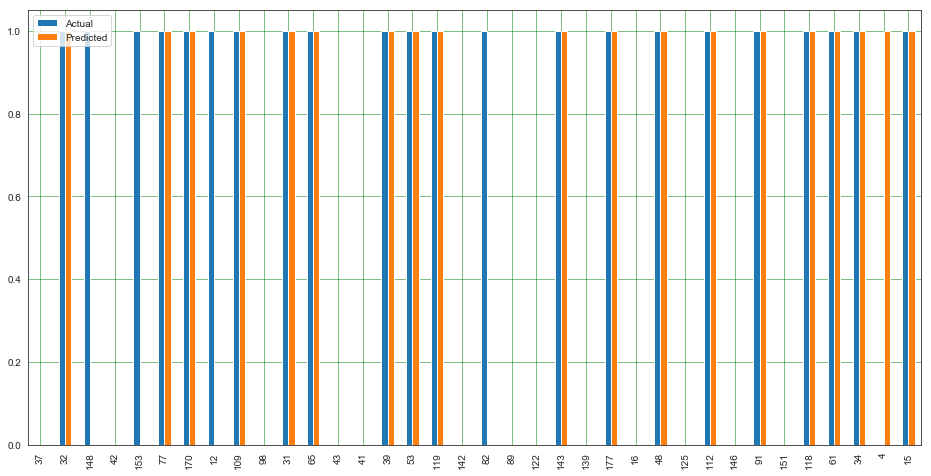

In [221]:
rfm = get_random_forest_model (X,y)

In [222]:
test_data = df_test_data.drop(columns=['patient_id'])
rfm.predict(test_data)

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0])

In [223]:
predicted_proba = rfm.predict_proba(test_data)
predicted_proba

array([[0.61959996, 0.38040004],
       [0.78286953, 0.21713047],
       [0.16229873, 0.83770127],
       [0.83550937, 0.16449063],
       [0.27593398, 0.72406602],
       [0.90613855, 0.09386145],
       [0.56734255, 0.43265745],
       [0.31774191, 0.68225809],
       [0.81745541, 0.18254459],
       [0.91333148, 0.08666852],
       [0.63647545, 0.36352455],
       [0.47545623, 0.52454377],
       [0.67367326, 0.32632674],
       [0.17829436, 0.82170564],
       [0.83784277, 0.16215723],
       [0.91370678, 0.08629322],
       [0.92398928, 0.07601072],
       [0.80129315, 0.19870685],
       [0.33723212, 0.66276788],
       [0.92365853, 0.07634147],
       [0.08135684, 0.91864316],
       [0.79554631, 0.20445369],
       [0.80116666, 0.19883334],
       [0.87004568, 0.12995432],
       [0.52292315, 0.47707685],
       [0.17259301, 0.82740699],
       [0.63369003, 0.36630997],
       [0.76209097, 0.23790903],
       [0.41583073, 0.58416927],
       [0.90079956, 0.09920044],
       [0.

In [224]:
predicted_proba[:, 1]

array([0.38040004, 0.21713047, 0.83770127, 0.16449063, 0.72406602,
       0.09386145, 0.43265745, 0.68225809, 0.18254459, 0.08666852,
       0.36352455, 0.52454377, 0.32632674, 0.82170564, 0.16215723,
       0.08629322, 0.07601072, 0.19870685, 0.66276788, 0.07634147,
       0.91864316, 0.20445369, 0.19883334, 0.12995432, 0.47707685,
       0.82740699, 0.36630997, 0.23790903, 0.58416927, 0.09920044,
       0.85501417, 0.44122709, 0.51184127, 0.38437506, 0.18279254,
       0.18279254, 0.36566676, 0.23661821, 0.31492642, 0.09721493,
       0.92573093, 0.25145193, 0.80785363, 0.12467902, 0.82992369,
       0.10117913, 0.18279254, 0.36035191, 0.11964723, 0.56565116,
       0.58985244, 0.07951242, 0.93251365, 0.09307018, 0.39131851,
       0.09148624, 0.74721513, 0.29415798, 0.22417075, 0.62862377,
       0.0836294 , 0.84703808, 0.18128533, 0.76336909, 0.10958685,
       0.6132338 , 0.57751327, 0.58653274, 0.76195208, 0.61102552,
       0.18223042, 0.91232114, 0.86226898, 0.94822779, 0.78471

In [225]:
patient_ids = df_test_data['patient_id']
probabilities = predicted_proba[:, 1]

predicted_data = pd.DataFrame({'patient_id': patient_ids, 
                               'heart_disease_present': probabilities})
predicted_data.to_csv("predictions.csv", index=False)

In [226]:
predicted_data

,patient_id,heart_disease_present
0,olalu7,0.380400
1,z9n6mx,0.217130
2,5k4413,0.837701
3,mrg7q5,0.164491
4,uki4do,0.724066
5,kev1sk,0.093861
6,9n6let,0.432657
7,jxmtyg,0.682258
8,51s2ff,0.182545
9,wi9mcs,0.086669
